In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ruta=''
df=pd.read_csv(ruta+'API_SI.POV.DDAY_DS2.csv',encoding='latin-1',sep='\t')
df.head(10)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3,NaN,NaN
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4,NaN,NaN
9,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualización de datos faltantes

In [41]:
# Mapa de calor
dfNaN=df.isna()
dfNaN.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
3,False,False,True,True,True,True,True,True,True,True,...,True,False,True,False,False,False,False,True,True,True
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


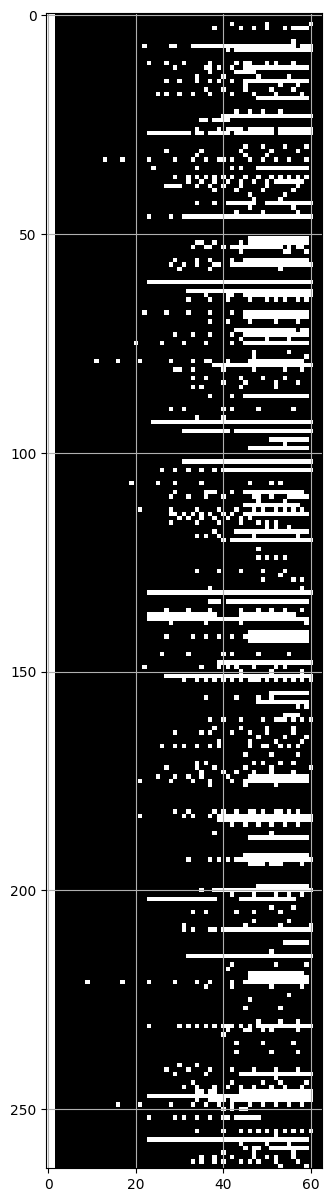

In [42]:
plt.figure(figsize=(5,15))
#plt.imshow(dfNaN) # Mapea el 1 (True) a amarillo y el 0 (False) a morado
#plt.imshow(dfNaN,cmap='gray') # NaN=Blanco
plt.imshow(~dfNaN,cmap='gray') # NaN=Negro
plt.grid()

In [43]:
# Matriz de co-ocurrencia entre Argentina (index 7) y Armenia (index 8)
df[df['Country Name']=='Argentina']

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3,NaN,NaN


In [44]:
df.loc[7]

Country Name    Argentina
Country Code          ARG
1960                  NaN
1961                  NaN
1962                  NaN
                  ...    
2016                  1.0
2017                  0.8
2018                  1.3
2019                  NaN
2020                  NaN
Name: 7, Length: 63, dtype: object

In [45]:
dfcopy=df.copy()
dfcopy.fillna('NaN',inplace=True)
pd.crosstab(dfcopy.loc[7],dfcopy.loc[8])

8,0.9,1.0,1.2,1.3,1.4,1.5,1.6,1.8,2.1,2.7,5.5,7.9,10.5,12.2,14.4,ARM,Armenia,NaN
7,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1.1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Eliminacón de datos

In [46]:
# Elinación de filas (variables)
df.dropna()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [47]:
# Eliminación de columnas (observaciones)
df.dropna(axis=1)

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


In [48]:
dfNaN.sum(axis=1),df.shape

(0      61
 1      61
 2      58
 3      52
 4      61
        ..
 259    49
 260    58
 261    54
 262    52
 263    59
 Length: 264, dtype: int64,
 (264, 63))

In [49]:
idx=np.where(dfNaN.sum(axis=1)==61)[0]
idx

array([  0,   1,   4,   5,   9,  10,  20,  21,  25,  28,  29,  34,  36,
        47,  48,  49,  50,  55,  59,  60,  62,  66,  67,  71,  76,  82,
        86,  88,  89,  91,  94,  96, 100, 101, 103, 105, 106, 108, 121,
       123, 125, 126, 130, 133, 135, 140, 144, 145, 147, 153, 154, 159,
       162, 168, 170, 177, 178, 179, 180, 181, 186, 189, 190, 191, 195,
       196, 197, 198, 203, 206, 210, 211, 213, 216, 223, 226, 228, 229,
       234, 236, 238, 239, 251, 253, 254], dtype=int64)

In [50]:
col,=np.where(dfNaN.sum()==264)
col

array([ 2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 15, 18, 61, 62],
      dtype=int64)

In [51]:
df.drop(index=idx,columns=df.columns[col])

,Country Name,Country Code,1967,1969,1971,1974,1975,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.8,NaN,1.6,1.1,0.9,1.3,NaN
6,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.8,1.1,1.1,1.0,0.9,NaN,1.0,0.8,1.3
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3,1.0,1.2,0.9,1.8,1.5,1.3,1.2,0.9,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2,2.5,1.7,0.6,0.3,1.0,0.7,0.8,0.4,NaN
260,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.3,NaN,NaN,NaN,NaN
261,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.2,NaN,NaN,NaN,18.7,NaN,NaN,NaN,NaN
262,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65.8,NaN,NaN,NaN,NaN,58.7,NaN,NaN,NaN


In [52]:
np.random.seed(666)
df=pd.DataFrame(data=np.random.randn(100,4)+np.random.rand(4),columns=['A','B','C','D'])
nansA=[25,30,58,70,71]
nansB=np.random.randint(99,size=np.random.randint(20))
nansC=np.random.randint(99,size=np.random.randint(20))
df.loc[nansA,'A']=np.NaN
df.iloc[nansB,1]=np.NaN
df.loc[nansC,'C']=np.NaN
df.isna().sum()

A     5
B     7
C    18
D     0
dtype: int64

In [53]:
nansC

array([81, 61, 13, 46, 83, 50, 77,  5, 73, 15, 17, 54,  6, 40, 45, 74, 67,
       71])

In [54]:
# Eliminando filas (observaciones)
df.dropna().iloc[17:28]

,A,B,C,D
22,-1.907541,0.203930,-1.437618,0.638521
23,0.301843,-0.184983,-0.947915,2.394596
24,-0.056119,-0.472800,1.266256,2.546835
26,-0.834386,-0.360385,-0.274807,1.877789
27,-0.602843,2.699373,1.950264,0.762447
28,0.286827,0.507209,0.495390,0.739651
29,0.919054,-1.567961,0.072833,0.041785
31,1.438280,-0.504422,0.407508,-0.705341
32,1.188013,-0.479266,0.318528,1.030024
33,0.515425,1.568134,-0.477285,1.108230


In [55]:
# Eliminando columnas (variables)
df.dropna(axis=1)

,D
0,1.733836
1,-0.118973
2,-0.106224
3,0.364201
4,1.053973
...,...
95,1.346082
96,1.459219
97,-0.573220
98,0.634467


# Imputación de datos

In [56]:
#@title Sustitución por media
m=df.mean()
s=df.std(ddof=0)
m

A   -0.049335
B    0.321315
C    0.161571
D    0.930127
dtype: float64

In [57]:
dfm=df.copy()
dfm=df.fillna(m)
dfm.iloc[23:32]

,A,B,C,D
23,0.301843,-0.184983,-0.947915,2.394596
24,-0.056119,-0.472800,1.266256,2.546835
25,-0.049335,1.014484,-0.502047,2.687678
26,-0.834386,-0.360385,-0.274807,1.877789
27,-0.602843,2.699373,1.950264,0.762447
28,0.286827,0.507209,0.495390,0.739651
29,0.919054,-1.567961,0.072833,0.041785
30,-0.049335,-1.372868,-0.172903,1.494710
31,1.438280,-0.504422,0.407508,-0.705341


In [58]:
m-dfm.mean()

A    2.081668e-17
B    5.551115e-17
C   -2.775558e-17
D    0.000000e+00
dtype: float64

In [59]:
s-dfm.std(ddof=0) # Positivas

A    0.026029
B    0.036047
C    0.102632
D    0.000000
dtype: float64

In [60]:
#@title Sustitución por mediana
me=df.median()
me

A   -0.034494
B    0.222627
C    0.129817
D    0.954997
dtype: float64

In [61]:
dfme=df.copy()
dfme.fillna(me,inplace=True)
dfme.iloc[23:32]

,A,B,C,D
23,0.301843,-0.184983,-0.947915,2.394596
24,-0.056119,-0.472800,1.266256,2.546835
25,-0.034494,1.014484,-0.502047,2.687678
26,-0.834386,-0.360385,-0.274807,1.877789
27,-0.602843,2.699373,1.950264,0.762447
28,0.286827,0.507209,0.495390,0.739651
29,0.919054,-1.567961,0.072833,0.041785
30,-0.034494,-1.372868,-0.172903,1.494710
31,1.438280,-0.504422,0.407508,-0.705341


In [62]:
s-dfme.std(ddof=0)

A    0.026023
B    0.035722
C    0.102556
D    0.000000
dtype: float64

In [63]:
me-dfme.median()

A    0.0
B    0.0
C    0.0
D    0.0
dtype: float64

In [64]:
#@title Sustitución por moda
mo=df.mode().iloc[0]
mo

A   -3.160084
B   -1.567961
C   -2.627232
D   -1.036191
Name: 0, dtype: float64

In [65]:
dfmo=df.copy()
dfmo.fillna(mo,inplace=True)

In [66]:
dfmo.mode()

,A,B,C,D
0,-3.160084,-1.567961,-2.627232,-1.036191
1,NaN,NaN,NaN,-1.005891
2,NaN,NaN,NaN,-0.975912
3,NaN,NaN,NaN,-0.863158
4,NaN,NaN,NaN,-0.705341
...,...,...,...,...
95,NaN,NaN,NaN,2.546835
96,NaN,NaN,NaN,2.564039
97,NaN,NaN,NaN,2.574154
98,NaN,NaN,NaN,2.592995


In [67]:
s-dfmo.std(ddof=0) # :O

A   -0.181797
B   -0.076552
C   -0.368131
D    0.000000
dtype: float64

In [68]:
#@title Sustitución aleatoria
dim=df.A.shape[0]
i=np.random.randint(dim)
v=df.A[i]
i,v

(78, -2.1041516871369677)

In [69]:
dim=df.A.dropna().shape[0] # La dimensión ahora es de la variable sin datos perdidos
i=np.random.randint(dim)   # 
v=df.A.dropna().iloc[i]    # Obtenemos el valor aleatorio de la variable sin datos perdidos, desde la posición (no del índice)
i,v

(81, 1.7557406473760273)

In [70]:
nans,=np.where(df.A.isna())
nans

array([25, 30, 58, 70, 71], dtype=int64)

In [71]:
dim=df.A.dropna().shape[0]
i=np.random.randint(dim,size=len(nans))
i

array([57, 89, 92, 63, 64])

In [72]:
df.A.dropna().iloc[i]

60    1.179257
94   -1.247442
97   -0.288264
66   -0.217671
67   -0.156233
Name: A, dtype: float64

In [73]:
dfcopy=df.copy()
dfcopy.loc[nans]

,A,B,C,D
25,NaN,1.014484,-0.502047,2.687678
30,NaN,-1.372868,-0.172903,1.494710
58,NaN,-0.201486,1.315169,1.448712
70,NaN,0.371786,-0.333454,0.223702
71,NaN,-1.090512,NaN,1.810154


In [74]:
dfcopy.A.loc[nans]=df.A.dropna().iloc[i].values
dfcopy.loc[nans]

,A,B,C,D
25,1.179257,1.014484,-0.502047,2.687678
30,-1.247442,-1.372868,-0.172903,1.494710
58,-0.288264,-0.201486,1.315169,1.448712
70,-0.217671,0.371786,-0.333454,0.223702
71,-0.156233,-1.090512,NaN,1.810154


In [75]:
dfcopy=df.copy()
for v in df:
  dim=df[v].dropna().shape[0]
  nans,=np.where(df[v].isna())
  i=np.random.randint(dim,size=len(nans))
  dfcopy[v].loc[nans]=df[v].dropna().iloc[i].values
dfcopy.isna().sum()

A    0
B    0
C    0
D    0
dtype: int64

# Usando Clases

In [76]:
from sklearn.impute import SimpleImputer

In [77]:
imp=SimpleImputer() # Método predeterminado = media
data=imp.fit_transform(df)
data

array([[ 0.85961408,  0.90409826,  1.30636749,  1.73383615],
       [-0.53629546,  0.31463499,  0.15192774, -0.11897298],
       [ 0.67599915, -0.36231091,  0.74176947, -0.10622377],
       [ 1.01364824, -0.3127858 , -0.16583314,  0.36420071],
       [-1.05336699, -0.15163848, -1.55000129,  1.05397333],
       [-1.72119923,  1.26876488,  0.16157054,  1.67768962],
       [ 0.2300256 ,  1.73476998,  0.16157054,  0.29574006],
       [-0.62104631,  0.22262656, -0.56771635,  1.51192604],
       [ 0.00935024, -0.40562606,  0.42945326,  0.51210858],
       [-0.57587528, -0.39761924,  1.03002218,  0.96086669],
       [-0.22322881,  1.5348979 , -0.05552491,  0.78329879],
       [-0.94936592, -0.9281495 ,  0.32722333,  1.09202743],
       [-0.39104771,  1.87186732, -0.06340662,  2.34293322],
       [ 0.11264787,  0.36014094,  0.16157054,  2.02887909],
       [-0.41581474, -1.16331425, -1.735956  ,  0.92516546],
       [-3.0594446 ,  3.81764904,  0.16157054, -0.11234218],
       [ 0.60095128,  0.

In [78]:
pd.DataFrame(data,columns=df.columns)

,A,B,C,D
0,0.859614,0.904098,1.306367,1.733836
1,-0.536295,0.314635,0.151928,-0.118973
2,0.675999,-0.362311,0.741769,-0.106224
3,1.013648,-0.312786,-0.165833,0.364201
4,-1.053367,-0.151638,-1.550001,1.053973
...,...,...,...,...
95,0.798734,0.262438,2.867949,1.346082
96,0.115081,0.899850,1.007822,1.459219
97,-0.288264,0.213156,1.390551,-0.573220
98,-1.393749,1.165839,-0.599444,0.634467


In [79]:
imp=SimpleImputer(strategy='median') # strategy='most_frequent'  ->  moda

In [80]:
pd.DataFrame(imp.fit_transform(df),columns=df.columns)

,A,B,C,D
0,0.859614,0.904098,1.306367,1.733836
1,-0.536295,0.314635,0.151928,-0.118973
2,0.675999,-0.362311,0.741769,-0.106224
3,1.013648,-0.312786,-0.165833,0.364201
4,-1.053367,-0.151638,-1.550001,1.053973
...,...,...,...,...
95,0.798734,0.262438,2.867949,1.346082
96,0.115081,0.899850,1.007822,1.459219
97,-0.288264,0.213156,1.390551,-0.573220
98,-1.393749,1.165839,-0.599444,0.634467


In [81]:
!pip install feature-engine


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 290.0/290.0 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 1.4 MB/s eta 0:00:00


In [82]:
from feature_engine.imputation import RandomSampleImputer

In [83]:
imp=RandomSampleImputer() # Imputa todas las variables

In [84]:
imp.fit_transform(df).iloc[23:32]

,A,B,C,D
23,0.301843,-0.184983,-0.947915,2.394596
24,-0.056119,-0.472800,1.266256,2.546835
25,0.821328,1.014484,-0.502047,2.687678
26,-0.834386,-0.360385,-0.274807,1.877789
27,-0.602843,2.699373,1.950264,0.762447
28,0.286827,0.507209,0.495390,0.739651
29,0.919054,-1.567961,0.072833,0.041785
30,0.112648,-1.372868,-0.172903,1.494710
31,1.438280,-0.504422,0.407508,-0.705341


In [85]:
df.isna().sum()

A     5
B     7
C    18
D     0
dtype: int64

In [86]:
# 'A' -> media
# 'B' -> mediana
# 'C' -> aleatoria
d={'A':df.A.mean(),
   'B':df.B.median()}
df1=df.copy()
df1.fillna(d,inplace=True)
imp=RandomSampleImputer('C')
df2=imp.fit_transform(df1)
df2.isna().sum()

A    0
B    0
C    0
D    0
dtype: int64